## Computational Quantum Workbook
### Fall 2023 version 

There is an associated PDF document, which will provide detailed instructions and useful information. Please consult that document as you work through these exercises. Fill out the following markdown block with your information before you submit the document.

This document was written and tested using Anaconda Python 3.9, Jupyter 1.0. Mathematical equations like $y = x^2+1$ should be rendered using MathJAX. If the equation in this paragraph does not appear in math-styled italics, make sure this block has been executed. If the math does not render, please reach out. 

#### Your name: Alex Lee
#### Date Submitted: 11/12/2023
#### Collaborators (please be specific on who you worked with for each block): Prof. Lee on Block 8.

### Block 1: Complex Number Mathematics

Define the following variables and perform the following tasks. Have the answers to each part printed to the screen with an appropriate print statement. Again, the math should be rendered automatically. If you see a bunch of dollar sign symbols, execute the block. If the remain, reach out. 

1. Save the complex numbers $z=4-2i$ and $w = 5+i$ to appropriately named variables. 
2. Determine the complex conjugage of $z = 4-2i$.
3. Calculate: $s = z\cdot w$
4. Calculate the modulus-squared $|z|^2$ and save it as a float type, not a complex type.
5. Confirm that $|z|^2$ is the same as what you would expect from the Pythagorean theorem (where if $x = a+bi$, then $|x|^2 = a^2 + b^2$)
6. Since all complex numbers can be written as an exponential:  $w = |w|e^{i\theta}$, determine $|w|$ and $\theta$ for the complex number $w$. 
7. Confirm that when you evaluate $|w|e^{i\theta}$, you get back $w$.

In [102]:
''' Block 1: Complex Number Mathematics '''

import numpy as np 
#1 
z = 4 - 2j 
w = 5 + 1j 
print("1) z = {} and w = {}".format(z, w))

#2 
zconj = z.conjugate()
print("2) z complex conjugate is {}".format(zconj))

#3
s = z*w 
print("3) s=z*w is {}". format(s))

#4
z_modulussquarred = z*zconj
z_modulussquarred = z_modulussquarred.real
print("4) z modulus squarred is {}".format(z_modulussquarred))
print("  ",type(z_modulussquarred))

#5
zpythag = 4**2 + 2**2 
print("5) pythagorean theorem of z is {}".format(zpythag))

#6 
theta = np.arctan(w.imag/w.real)
wmagnitude = np.sqrt(w*w.conjugate())
print("6) w magnitude is {}, and theta is {}".format(wmagnitude, theta))

#7 
print("7) |𝑤|𝑒𝑖𝜃 is {}, and 𝑤 is {} which is basically equal to eachother".format(wmagnitude*np.exp(theta*1j), w))

1) z = (4-2j) and w = (5+1j)
2) z complex conjugate is (4+2j)
3) s=z*w is (22-6j)
4) z modulus squarred is 20.0
   <class 'float'>
5) pythagorean theorem of z is 20
6) w magnitude is (5.0990195135927845+0j), and theta is 0.19739555984988078
7) |𝑤|𝑒𝑖𝜃 is (4.999999999999999+1j), and 𝑤 is (5+1j) which is basically equal to eachother


### Block 2: Animation Tutorial

When instructed in the manual, run this block as is without changing anything. 

<IPython.core.display.Javascript object>


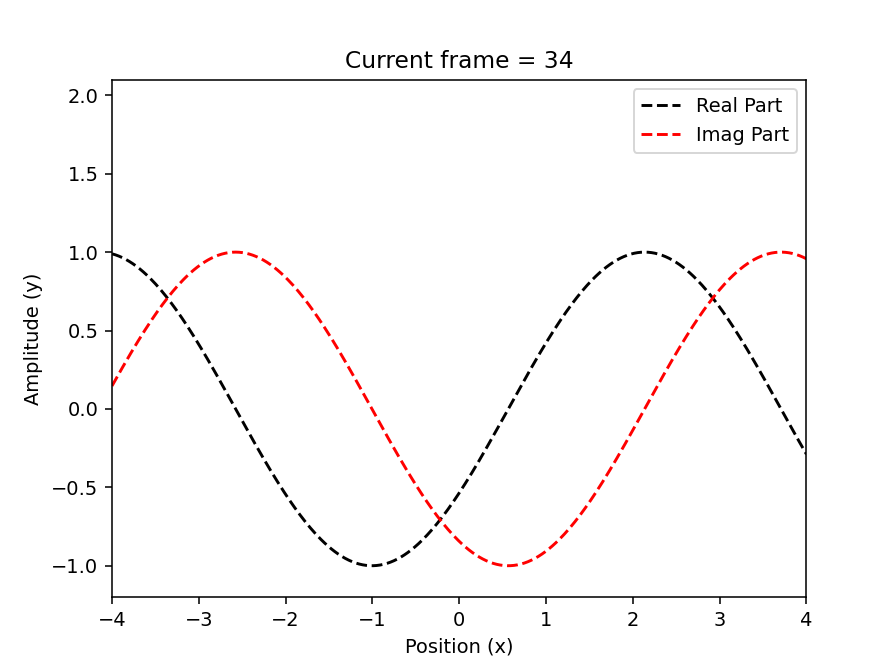

In [117]:
''' Block 2: Animation Tutorial '''


# Needed for interactivity and must come first
%matplotlib notebook 

# Import relevant modules (plotting, animating functions, and numpy)
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# create figure and axis objects. These are objects that plt.plot utilized under 
# the hood and have many of the same functions and options, 
# albeit sometimes with slightly different names. 
fig, ax = plt.subplots()

# number of frames
nFrames = 100

# horizontal axis range
xLeft = -4 
xRight= 4
x = np.linspace(xLeft,xRight,num=400)

# Define any global constants here.
k = 1 # 1/meter 
w = 3*k**2 # dispersion relationship 

# animations go from t = 0 to t = max_time  
# for a smooth animation of periodic motion, 
# should be some integer multiple of the period
max_time = 2*np.pi/w


# define what is plotted across x for a given moment in time (cur_t)
# Think of this as a loop where frame_num = 0, 1, ..., nFrames
def animate(frame_num):
    
    # clear the plot and (re)set fixed axis limits 
    ax.clear()
    plt.xlim(xLeft,xRight)
    plt.ylim(-1.2,2.1)
    
    # the current time of the frame (this changes everytime this function is called)
    cur_t = max_time*(frame_num/nFrames)
    
    # Using the cur_t, define the function f(x,t) you are plotting 
    Traveling_wave = np.exp( (k*x-w*cur_t)*1j )
    Rpart = Traveling_wave.real
    Ipart = Traveling_wave.imag
    
    # (re)draw the plot 
    plt.plot(x,Rpart,'k--',label='Real Part')
    plt.plot(x,Ipart,'r--',label='Imag Part')
    
    # plot annotations
    plt.legend(loc=1) # loc is a kwarg that forces the location of the legend
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude (y)")
    plt.title(f'Current frame = {frame_num}') # f-strings are great, learn and use those more. 
    
    return


# interval gives time spacing between each frame. Larger number means slower (given all else fixed)
anim = FuncAnimation(fig, animate, frames=nFrames, interval=1)

# Use the power button to stop the animation. If you are saving to a file, you won't see the animation 
# but still need to hit the stop button. The file may take a few seconds to be fully created. 

# Also have to stop the animation when saving to a file. .gif or .mp4 should work. 
# anim.save('Test.gif',dpi=150) # dpi=150 ups the resolution, default is kinda crappy. 

### Block 3: Amplitude

<IPython.core.display.Javascript object>


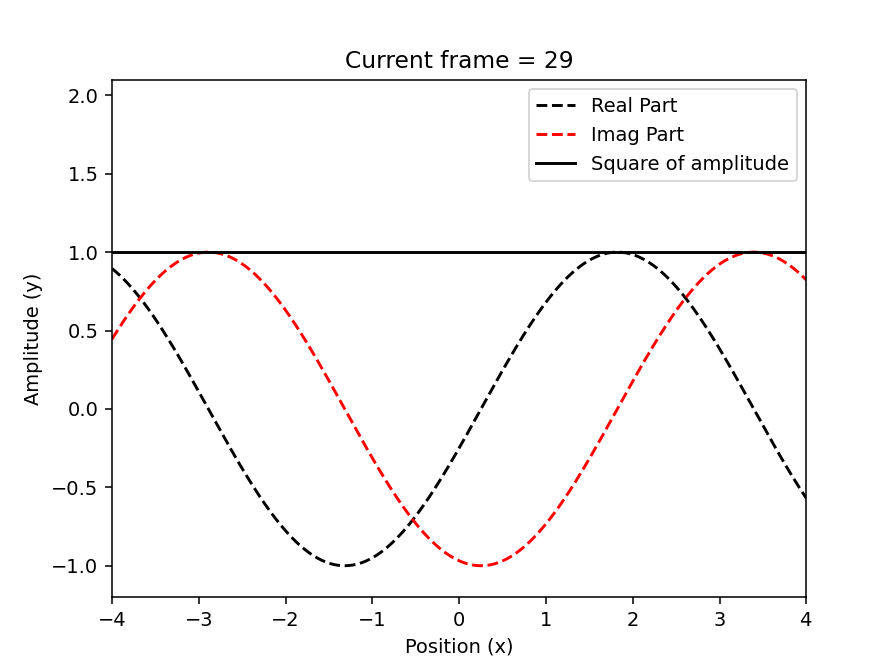

In [118]:
''' Block 3: Amplitude '''


# Needed for interactivity and must come first
%matplotlib notebook 

# Import relevant modules (plotting, animating functions, and numpy)
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# create figure and axis objects. These are objects that plt.plot utilized under 
# the hood and have many of the same functions and options, 
# albeit sometimes with slightly different names. 
fig, ax = plt.subplots()

# number of frames
nFrames = 100

# horizontal axis range
xLeft = -4 
xRight= 4
x = np.linspace(xLeft,xRight,num=400)

# Define any global constants here.
k = 1 # 1/meter 
w = 3*k**2 # dispersion relationship 

# animations go from t = 0 to t = max_time  
# for a smooth animation of periodic motion, 
# should be some integer multiple of the period
max_time = 2*np.pi/w


# define what is plotted across x for a given moment in time (cur_t)
# Think of this as a loop where frame_num = 0, 1, ..., nFrames
def animate(frame_num):
    
    # clear the plot and (re)set fixed axis limits 
    ax.clear()
    plt.xlim(xLeft,xRight)
    plt.ylim(-1.2,2.1)
    
    # the current time of the frame (this changes everytime this function is called)
    cur_t = max_time*(frame_num/nFrames)
    
    # Using the cur_t, define the function f(x,t) you are plotting 
    Traveling_wave = np.exp( (k*x-w*cur_t)*1j )
    Rpart = Traveling_wave.real
    Ipart = Traveling_wave.imag
    Traveling_wavesquarred = Traveling_wave*Traveling_wave.conjugate()
    
    # (re)draw the plot 
    plt.plot(x,Rpart,'k--',label='Real Part')
    plt.plot(x,Ipart,'r--',label='Imag Part')
    plt.plot(x, Traveling_wavesquarred, 'k', label = 'Square of amplitude')
    
    # plot annotations
    plt.legend(loc=1) # loc is a kwarg that forces the location of the legend
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude (y)")
    plt.title(f'Current frame = {frame_num}') # f-strings are great, learn and use those more. 
    
    return


# interval gives time spacing between each frame. Larger number means slower (given all else fixed)
anim = FuncAnimation(fig, animate, frames=nFrames, interval=1)

### Block 4: Moving Waves and Superposition

<IPython.core.display.Javascript object>


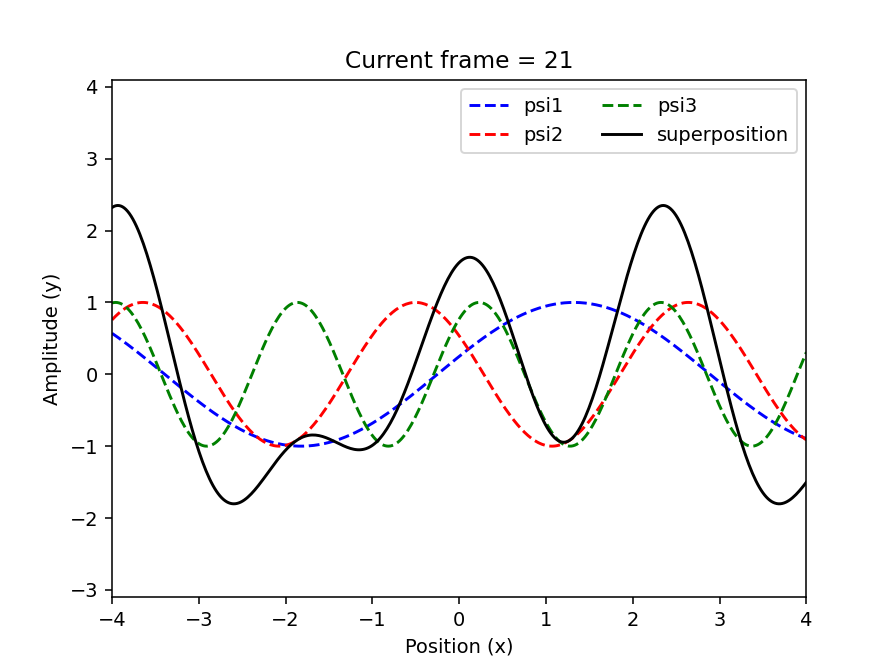

In [119]:
''' Block 4: Moving Waves and Superposition'''


# Needed for interactivity and must come first
%matplotlib notebook 

# Import relevant modules (plotting, animating functions, and numpy)
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

fig, ax = plt.subplots()

# number of frames
nFrames = 100

# horizontal axis range
xLeft = -4 
xRight= 4
x = np.linspace(xLeft,xRight,400)

# Define any global constants here.
k1 = 1 # 1/meter 
k2 = 2
k3 = -3

w1 = 0.5*k1**2 # dispersion relationship for k1

max_time = 2*np.pi/w1 # smallest value for omega--> longest period. 

def animate(frame_num):
    
    # clear the plot and (re)set fixed axis limits 
    ax.clear()
    plt.xlim(xLeft,xRight)
    plt.ylim(-3.1,4.1)
    
    # the current time of the frame (this changes everytime this function is called)
    cur_t = max_time*(frame_num/nFrames)
    
    # Using the cur_t, define the function f(x,t) you are plotting 
    psi1 = np.exp((k1*x - k1**2/2*cur_t)*1j)
    psi2 = np.exp((k2*x - k2**2/2*cur_t)*1j)
    psi3 = np.exp((k3*x - k3**2/2*cur_t)*1j)
    superpositionreal = psi1.real + psi2.real + psi3.real
    
    # (re)draw the plot 
    plt.plot(x, psi1.real, 'b--', label = "psi1")
    plt.plot(x, psi2.real, 'r--', label = "psi2")
    plt.plot(x, psi3.real, 'g--', label = "psi3")
    plt.plot(x, superpositionreal,'k', label = "superposition")
    
    # plot annotations
    plt.legend(loc=1,ncol=2) # loc is a kwarg that forces the location of the legend
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude (y)")
    plt.title(f'Current frame = {frame_num}') # f-strings a great, learn and use those more. 
    
    return


anim = FuncAnimation(fig, animate, frames=nFrames, interval=1)

# c)
# lamba = 2pi/k. k2 is bigger than k1, this means that the wavelength of the second wave is smaller compared to the first wave. 
# My animation does confirm that the wavelength of the second wave is smaller than the first wave. 

# d) 
# v1 = w1/k1 = 0.5*k1. v2 = 0.5*k2. k2 is bigger than k1, so half of k2 is also bigger than half of k1. This means that in 
# theory the phase speed of wave 2 should be faster than wave 1. The animation supports this theory.

### Block 5: Numerical Integrals and Orthogonality

In [120]:
''' Block 5: Numerical Integrals and Orthogonality '''

import numpy as np 

'''
psi: Evaluates the nth stationary state for the infinite square well
inputs: x (float or array), n (positive integer), a (positive float)
output: psi_n(x) evaluated at all x values
'''
# a) 
def psi(x,n,a):
    
    # sanity checks 
    assert n>0 and type(n)==int , "n takes on integer values 1,2,3,..."
    assert a>0 , "size of well, a, should be positive"
    
    val = 0
    
    # ADD STUFF HERE 
    val = np.sqrt(2/a)*np.sin(n*np.pi*x/a)
    
    return(val)


# b)
# Add stuff here 
x = np.linspace(0, 2, 1000)
area = np.trapz(psi(x, 1, 2)**2, x)  # a = 2, n = 1
print("b)", area, "this is expected.")

# c) 
# gonna use same a. m = 1, and n =2
area = np.trapz(psi(x, 1, 2)*psi(x, 2, 2), x)
print("c)", area, "this is expected.")

# d) 
def psi_star_psi(x, a, nMax, mMax):
    assert nMax >= 1 and type(nMax) == int
    assert mMax >= 1 and type(mMax) == int
    assert a>0 , "size of well, a, should be positive"
    
    n_equal_m = []
    n_notequal_m = []
    
    for i in range(1, nMax + 1):
        for j in range(1, mMax + 1):
            if j == i:
                n_equal_m.append(np.trapz(psi(x, i, a)*psi(x, j, a), x))
            else:
                n_notequal_m.append(np.trapz(psi(x, i, a)*psi(x, j, a), x))
                
    return ("when n = m,", n_equal_m ,".When n != m,", n_notequal_m)
psi_star_psi(x, 2, 50, 44)
# yep, the numerical calculations demonstrate the orthogonality relationship. 

b) 1.0 this is expected.
c) 0.0 this is expected.


('when n = m,',
 [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0000000000000002,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0000000000000002,
  1.0,
  1.0,
  1.0000000000000002,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0000000000000002,
  1.0,
  1.0,
  1.0000000000000002,
  1.0,
  1.0000000000000002,
  1.0,
  1.0,
  1.0],
 '.When n != m,',
 [0.0,
  0.0,
  0.0,
  -8.326672684688674e-17,
  0.0,
  -3.469446951953614e-17,
  -4.163336342344337e-17,
  1.3877787807814457e-17,
  0.0,
  -1.0408340855860843e-17,
  6.938893903907228e-18,
  1.0408340855860843e-17,
  1.8041124150158794e-16,
  3.122502256758253e-17,
  9.71445146547012e-17,
  -1.9081958235744878e-17,
  3.469446951953614e-17,
  -3.469446951953614e-17,
  4.85722573273506e-17,
  3.469446951953614e-18,
  -1.8041124150158794e-16,
  6.938893903907228e-18,
  -6.938893903907228e-18,
  -3.469446951953614e-18,
  -2.42861286636753e-17,
  6.938893903907228

### Block 6: Normalization 

In [121]:
''' Block 6: Normalization '''


import numpy as np


'''
Psi0: Function to evaluate the initial wavefunction, with or without a normalization constant
inputs: x (array or float), a (positive float), Anorm (float, defaults to 1)
output: function evaluated at all x values
''' 
def Psi0(x,a,Anorm=1):
    fx = np.sin(3*np.pi*x/a) # your favorite function here
    val = Anorm*fx
    return(val)

'''
Normalize: evaluates the normalization constant when integrating the input function squared well 
using the trapezoid rule. 
inputs: fun(x,a) (function that requires two inputs, an array of x values and the size of the well)
        x (array) positions to evaluate function, and a (positive float), size of the well
output: val (float) the normalization constant. 
'''
# a)
def Normalize(fun,x,a):
    A = np.sqrt(1/np.trapz(fun(x,a)**2, x))
   

    return(A)

# b)
a = 5
x = np.linspace(0, a, 1000)
A = Normalize(Psi0, x, a)
print("b)",A)
print("√2/a =",np.sqrt(2/a))

# c)
print("c)",np.trapz((A**2)*(Psi0(x, a))**2, x))



b) 0.6324555320336759
√2/a = 0.6324555320336759
c) 1.0


### Block 7: Projection and Energy Coefficients

e) [ 0.00000000e+00  9.99277247e-01  3.94988404e-17  3.70102559e-02
  5.64191706e-17  7.99419686e-03  1.31906747e-16  2.91331508e-03
 -5.43049763e-17  1.37071244e-03 -2.25649577e-17]


<IPython.core.display.Javascript object>


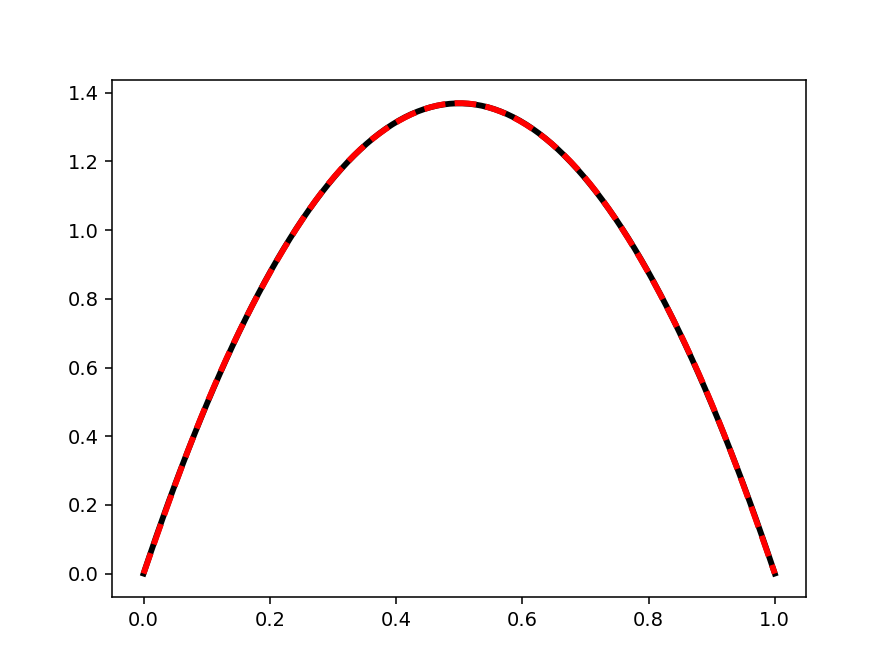

In [122]:
''' Block 7: Projection and Energy Coefficients'''

import numpy as np
import matplotlib.pyplot as plt 


'''
copy your psi and Normalize functions here 
'''
def psi(x,n,a):
    
    # sanity checks 
    assert n>0 and type(n)==int , "n takes on integer values 1,2,3,..."
    assert a>0 , "size of well, a, should be positive"
    
    val = 0
    
    # ADD STUFF HERE 
    val = np.sqrt(2/a)*np.sin(n*np.pi*x/a)
    
    return(val)

def Normalize(fun,x,a):
    A = np.sqrt(1/np.trapz(fun(x,a)**2, x))
   
    return(A)

# Initial wavefunction, given here 
def Psi0(x,a,Anorm=1):
    val = 0
    
    fx = x*(a-x) 
    val = Anorm*fx
 
    return(val)


'''
calc_cn: calculates the coefficients c_n so to write Psi0 as a superposition of stationary states 
inputs: Psi0(x,a,A) (function that assumes inputs array x, well size a, optional normalization constant A), 
         psi(x,n,a) (function that assumes array x, positive integer n, well size a), x (array), a (positive float)
         Anorm (float, defaults to 1), and nMax (positive integer, defaults to 10)
outputs: array holding a 0 in the 0th index and the c_n values for indices n > 0. 
'''
# c)
def calc_cn(Psi0,psi,x,a,Anorm=1,nMax=10): 
    cn = np.zeros(nMax+1) # will put c_1 in cn[1], not cn[0], for sanity 
    
    # put a loop that starts at n=1 and goes up to and including nMax
    # for each pass through the loop, evaluate c_n and save it to the cn array in the appropriate location
    for i in range(1, nMax + 1):
        cn[i] = np.trapz(psi(x, i, a)*Psi0(x, a, Anorm), x)
    
    return(cn)

# d)
a = 1
x = np.linspace(0,a,100)
nMax = 10

# e) 
Anorm = Normalize(Psi0, x, a)
cn = calc_cn(Psi0, psi, x, a, Anorm, nMax)
print("e)", cn)

# f)
plt.plot(x, Psi0(x, a, Anorm), 'k-', lw = 3)

# g) 
array = 0
for i in range(1, nMax+1):
    array += cn[i]*psi(x, i, a)
    
plt.plot(x, array, 'r--', lw = 3)

# h)
# Since we know that |cn|**2 is the probability of getting En. Then that means that the sum of all |cn|**2 should be 1. 
# So we can determine if we have included enough coefficients if the sum of all |cn|**2 is near 1. 

### Block 8: Calculating and Animating Psi(x,t) - Stationary State

<IPython.core.display.Javascript object>


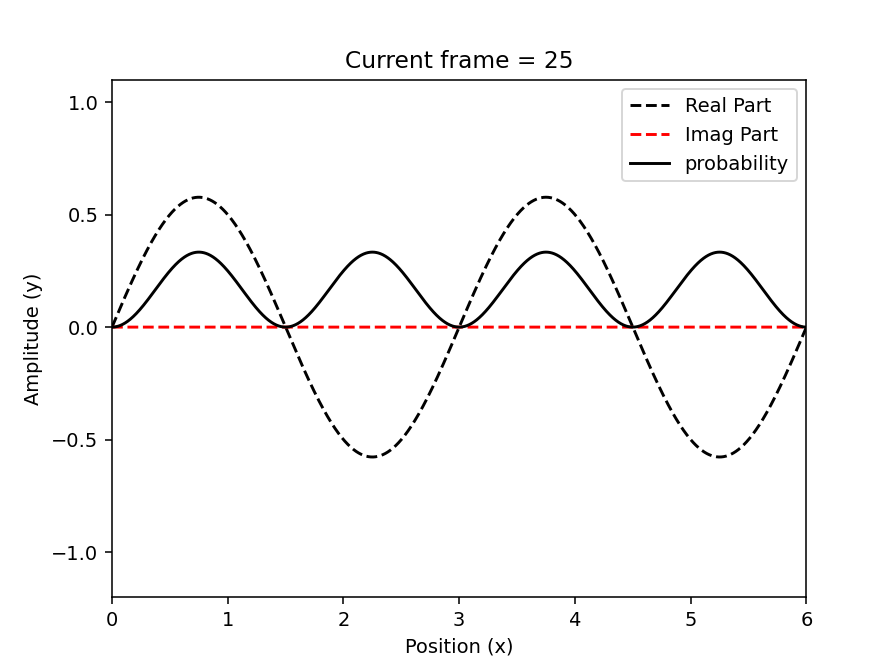

In [123]:
''' Block 8: Calculating and Animating Psi(x,t) - Stationary State '''

# Needed for interactivity and must come first
%matplotlib notebook 

# Import relevant modules (plotting, animating functions, and numpy)
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np


'''
bring over and define all your functions here 
'''
# a) 
def Normalize(fun,x,a):
    A = np.sqrt(1/np.trapz(fun(x,a)**2, x))
   
    return(A)

def psi(x,n,a):
    
    # sanity checks 
    assert n>0 and type(n)==int , "n takes on integer values 1,2,3,..."
    assert a>0 , "size of well, a, should be positive"
    
    val = 0
    
    # ADD STUFF HERE 
    val = np.sqrt(2/a)*np.sin(n*np.pi*x/a)
    
    return(val)

def calc_cn(Psi0,psi,x,a,Anorm=1,nMax=10): 
    cn = np.zeros(nMax+1) # will put c_1 in cn[1], not cn[0], for sanity 
    
    # put a loop that starts at n=1 and goes up to and including nMax
    # for each pass through the loop, evaluate c_n and save it to the cn array in the appropriate location
    for i in range(1, nMax + 1):
        cn[i] = np.trapz(psi(x, i, a)*Psi0(x, a, Anorm), x)
    
    return(cn)
# b)
def Eng(n, a):
    val = n**2*np.pi**2/(2*a**2)
    return(val)

# Initial wavefunction (A stationary state)
# nFrames = 100, nMax = 10, max_time = 2*np.pi/omega1 , plt.ylim(-1.2,1.1)
def Psi0(x,a,Anorm=1):
    val = Anorm*psi(x,4,a)
    return(val)


# create figure and axis objects. These are objects that plt.plot utilized under 
# the hood and have many of the same functions and options, albeit sometimes with slightly 
# different names. 
fig, ax = plt.subplots()

# number of frames
nFrames = 100

# finite square well constants 
a = 6     # size of well 
nMax = 5 # number of c_n

# horizontal axis range
xLeft = 0
xRight= a
x = np.linspace(xLeft,xRight,2000) # why not... 


# Determine normalization constant 
A = Normalize(Psi0, x, a)

# Calculate the c_n outside the loop, since they do not depend on time. 
cn = calc_cn(Psi0, psi, x, a, A, nMax)


# shortest frequency omega_1
omega_1 = Eng(1, a)

# animations go from t = 0 to t = max_time  
# for a smooth animation of periodic motion, 
# should be some integer multiple of the period
max_time = 2*np.pi/omega_1

# define what is plotted across x for a given moment in time (cur_t)
# Think of this as a loop where frame_num = 0, 1, ..., nFrames
def animate(frame_num):
    
    # clear the plot and (re)set fixed axis limits 
    ax.clear()
    plt.xlim(xLeft,xRight)
    plt.ylim(-1.2,1.1)
    
    # the current time of the frame (this changes everytime this function is called)
    cur_t = max_time*(frame_num/nFrames)
    
    # Using the cur_t, define the function f(x,t) you are plotting 
    superposition = np.zeros(len(x),dtype=np.cdouble)
    
    
    for n in range(1, nMax+1):
        superposition += cn[n]*psi(x, n, a)*np.exp((-1j)*Eng(n, a)*cur_t)
    
    # List comprehension technique, see manual for explanation 
    Rpart = np.array([ s.real for s in superposition ])
    Ipart = np.array([ s.imag for s in superposition ])
    probability = Rpart**2 + Ipart**2
    
    # (re)draw the plot 
    plt.plot(x, Rpart,'k--',label='Real Part')
    plt.plot(x, Ipart,'r--',label='Imag Part')
    plt.plot(x, probability, 'k', label = 'probability')
    
    # plot annotations
    plt.legend(loc=1) # loc is a kwarg that forces the location of the legend
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude (y)")
    plt.title(f'Current frame = {frame_num}') # f-strings are great, learn and use those more. 
    
    return

# interval gives time spacing between each frame. Larger number means slower (given all else fixed)
anim = FuncAnimation(fig, animate, frames=nFrames, interval=1)

# Use the power button to stop the animation. If you are saving to a file, you won't see the animation 
# but still need to hit the stop button. The file may take a few seconds to be fully created. 

# Also have to stop the animation when saving to a file. .gif or .mp4 should work. 
# anim.save('Test.gif',dpi=150) # dpi=150 ups the resolution, default is kinda crappy. 

### Block 9: Example 2.2

$$ \Psi(x,0) = A x\cdot (a-x) $$

```# nFrames = 100, nMax = 100, max_time = 2*np.pi/omega1 , plt.ylim(-1.2,1.1)```

<IPython.core.display.Javascript object>


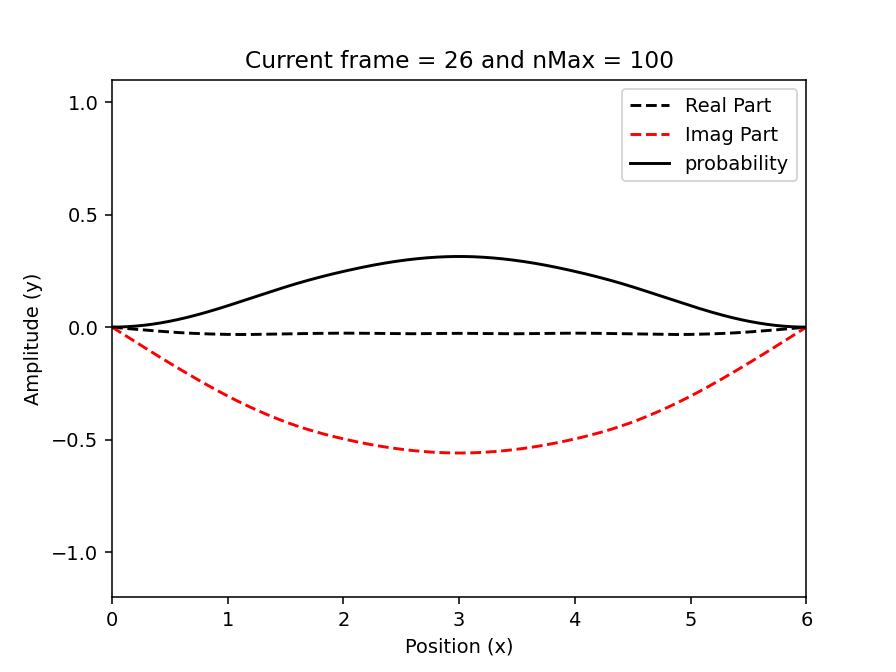

when i change nMax to 2, the probability line doesn't bob up and down in the middle.
      When nMax is 10 or 100, I can't really see any difference


In [124]:
# Initial wavefunction (Example 2.2 in book)
# nFrames = 100, nMax = 10, max_time = 2*np.pi/omega1 , plt.ylim(-1.2,1.1)

%matplotlib notebook 

# Import relevant modules (plotting, animating functions, and numpy)
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

def Normalize(fun,x,a):
    A = np.sqrt(1/np.trapz(fun(x,a)**2, x))
   
    return(A)

def psi(x,n,a):
    
    # sanity checks 
    assert n>0 and type(n)==int , "n takes on integer values 1,2,3,..."
    assert a>0 , "size of well, a, should be positive"
    
    val = 0
    
    # ADD STUFF HERE 
    val = np.sqrt(2/a)*np.sin(n*np.pi*x/a)
    
    return(val)

def calc_cn(Psi0,psi,x,a,Anorm=1,nMax=10): 
    cn = np.zeros(nMax+1) # will put c_1 in cn[1], not cn[0], for sanity 
    
    # put a loop that starts at n=1 and goes up to and including nMax
    # for each pass through the loop, evaluate c_n and save it to the cn array in the appropriate location
    for i in range(1, nMax + 1):
        cn[i] = np.trapz(psi(x, i, a)*Psi0(x, a, Anorm), x)
    
    return(cn)

def Eng(n, a):
    val = n**2*np.pi**2/(2*a**2)
    return(val)

# Initial wavefunction (A stationary state)
# nFrames = 100, nMax = 10, max_time = 2*np.pi/omega1 , plt.ylim(-1.2,1.1)
def Psi0(x,a,Anorm=1):
    val = 0
    val = Anorm*np.sqrt(30/a**5)*x*(a-x)
    return(val)


# create figure and axis objects. These are objects that plt.plot utilized under 
# the hood and have many of the same functions and options, albeit sometimes with slightly 
# different names. 
fig, ax = plt.subplots()

# number of frames
nFrames = 100

# finite square well constants 
a = 6     # size of well 
nMax = 100 # number of c_n

# horizontal axis range
xLeft = 0
xRight= a
x = np.linspace(xLeft,xRight,2000) # why not... 


# Determine normalization constant 
A = Normalize(Psi0, x, a)

# Calculate the c_n outside the loop, since they do not depend on time. 
cn = calc_cn(Psi0, psi, x, a, A, nMax)


# shortest frequency omega_1
omega_1 = Eng(1, a)

# animations go from t = 0 to t = max_time  
# for a smooth animation of periodic motion, 
# should be some integer multiple of the period
max_time = 2*np.pi/omega_1

# define what is plotted across x for a given moment in time (cur_t)
# Think of this as a loop where frame_num = 0, 1, ..., nFrames
def animate(frame_num):
    
    # clear the plot and (re)set fixed axis limits 
    ax.clear()
    plt.xlim(xLeft,xRight)
    plt.ylim(-1.2,1.1)
    
    # the current time of the frame (this changes everytime this function is called)
    cur_t = max_time*(frame_num/nFrames)
    
    # Using the cur_t, define the function f(x,t) you are plotting 
    superposition = np.zeros(len(x),dtype=np.cdouble)
    
    
    for n in range(1, nMax+1):
        superposition += cn[n]*psi(x, n, a)*np.exp((-1j)*Eng(n, a)*cur_t)
    
    # List comprehension technique, see manual for explanation 
    Rpart = np.array([ s.real for s in superposition ])
    Ipart = np.array([ s.imag for s in superposition ])
    probability = Rpart**2 + Ipart**2
    
    # (re)draw the plot 
    plt.plot(x, Rpart,'k--',label='Real Part')
    plt.plot(x, Ipart,'r--',label='Imag Part')
    plt.plot(x, probability, 'k', label = 'probability')
    
    # plot annotations
    plt.legend(loc=1) # loc is a kwarg that forces the location of the legend
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude (y)")
    plt.title(f'Current frame = {frame_num} and nMax = {nMax}') # f-strings are great, learn and use those more. 
    
    return


# interval gives time spacing between each frame. Larger number means slower (given all else fixed)
anim = FuncAnimation(fig, animate, frames=nFrames, interval=1)
print('''when i change nMax to 2, the probability line doesn't bob up and down in the middle.
      When nMax is 10 or 100, I can't really see any difference''')

### Block 10: Triangle Shape from Exam 1

$$ \Psi(x,0) = \begin{cases} A x & 0\leq x \leq a/2 \\ A(a-x) & a/2 < x \leq a \end{cases}$$ 

```# nFrames = 100, nMax = 100, max_time = 2*np.pi/omega1 , plt.ylim(-1.2,1.1)```

<IPython.core.display.Javascript object>


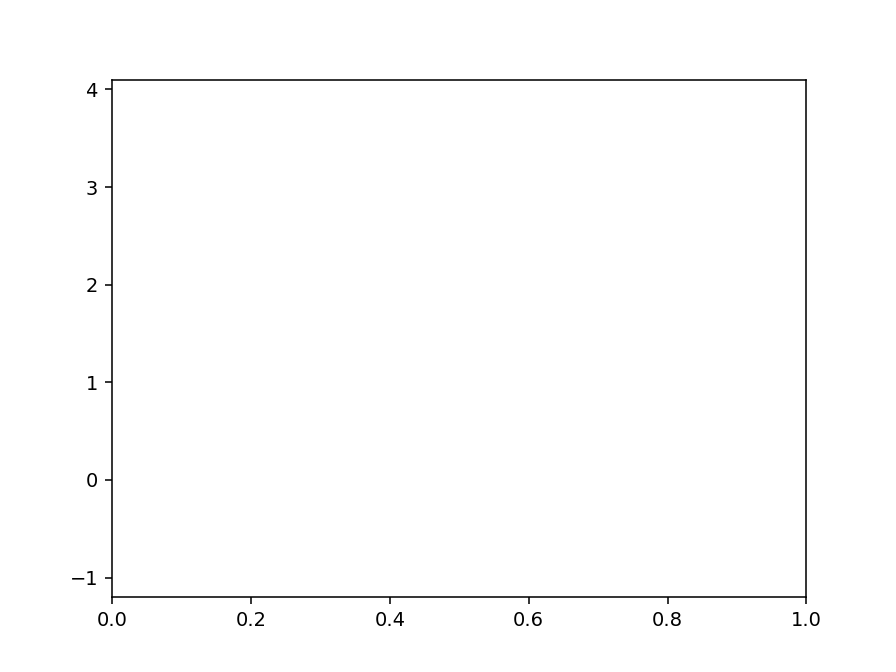

<IPython.core.display.Javascript object>


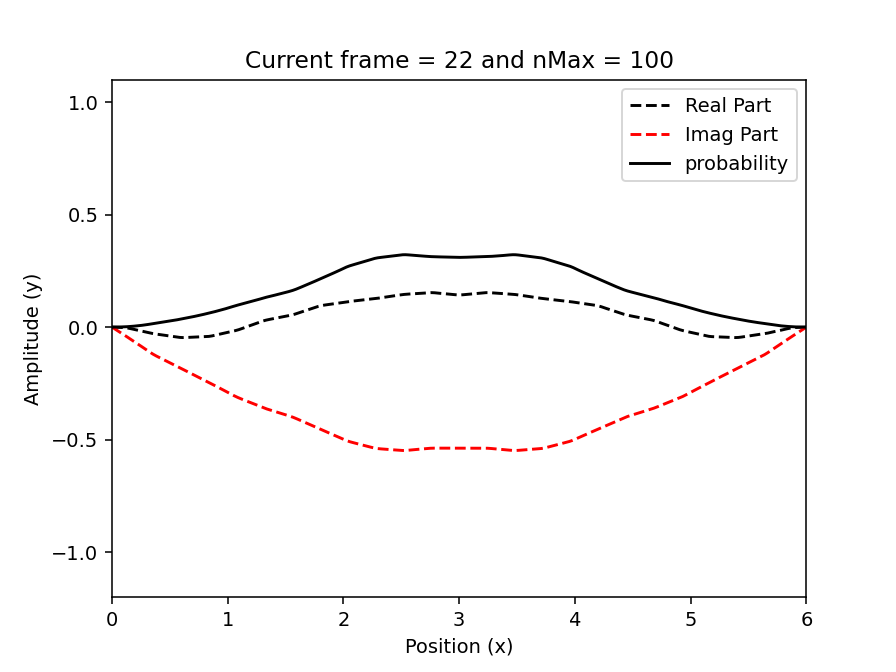

a) I see.
b) It tends to be located on average at x = 3.


In [125]:
# Initial wavefunction (Triangle Case from exam 1)
nFrames = 100
nMax = 100
max_time = 2*np.pi/omega_1 
plt.ylim(-1.2,1.1)
fig, ax = plt.subplots()

def Psi0(x,a,Anorm=1):
    val = np.zeros(len(x))
    for idx in range(len(x)):
        if(x[idx]<a/2):
            val[idx] = Anorm*x[idx]
        else:
            val[idx] = Anorm*(a-x[idx])
    return(val)

A = Normalize(Psi0, x, a)
cn = calc_cn(Psi0, psi, x, a, A, nMax)

def animate(frame_num):
    
    # clear the plot and (re)set fixed axis limits 
    ax.clear()
    plt.xlim(xLeft,xRight)
    plt.ylim(-1.2,1.1)
    
    # the current time of the frame (this changes everytime this function is called)
    cur_t = max_time*(frame_num/nFrames)
    
    # Using the cur_t, define the function f(x,t) you are plotting 
    superposition = np.zeros(len(x),dtype=np.cdouble)
    
    
    for n in range(1, nMax+1):
        superposition += cn[n]*psi(x, n, a)*np.exp((-1j)*Eng(n, a)*cur_t)
    
    # List comprehension technique, see manual for explanation 
    Rpart = np.array([ s.real for s in superposition ])
    Ipart = np.array([ s.imag for s in superposition ])
    probability = Rpart**2 + Ipart**2
    
    # (re)draw the plot 
    plt.plot(x, Rpart,'k--',label='Real Part')
    plt.plot(x, Ipart,'r--',label='Imag Part')
    plt.plot(x, probability, 'k', label = 'probability')
    
    # plot annotations
    plt.legend(loc=1) # loc is a kwarg that forces the location of the legend
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude (y)")
    plt.title(f'Current frame = {frame_num} and nMax = {nMax}') # f-strings are great, learn and use those more. 
    
    return


# interval gives time spacing between each frame. Larger number means slower (given all else fixed)
anim = FuncAnimation(fig, animate, frames=nFrames, interval=1)

print('''a) I see.
b) It tends to be located on average at x = 3.''')
      

### Block 11: Uniform

$$ \Psi(x,0) = A $$

```# nFrames = 100, nMax = 500, max_time = 0.1*2*np.pi/omega1 , plt.ylim(-1.2,1.1)```

<IPython.core.display.Javascript object>


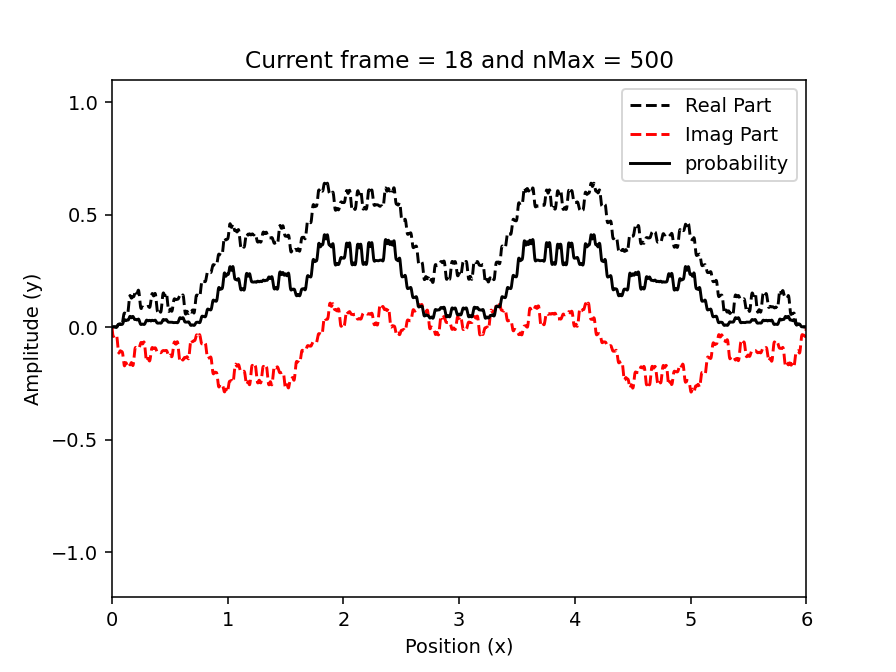

a) I see some janky lines. Not smooth at all. Very jagged and ugly looking.


In [126]:
# Initial wavefunction (Uniform, ringing at edges. )
nFrames = 100
nMax = 500
max_time = 0.1*2*np.pi/omega_1 
plt.ylim(-1.2,1.1)
fig, ax = plt.subplots()

def Psi0(x,a,Anorm=1):
    val = Anorm*np.ones(len(x))
    return(val)

A = Normalize(Psi0, x, a)
cn = calc_cn(Psi0, psi, x, a, A, nMax)

def animate(frame_num):
    
    # clear the plot and (re)set fixed axis limits 
    ax.clear()
    plt.xlim(xLeft,xRight)
    plt.ylim(-1.2,1.1)
    
    # the current time of the frame (this changes everytime this function is called)
    cur_t = max_time*(frame_num/nFrames)
    
    # Using the cur_t, define the function f(x,t) you are plotting 
    superposition = np.zeros(len(x),dtype=np.cdouble)
    
    
    for n in range(1, nMax+1):
        superposition += cn[n]*psi(x, n, a)*np.exp((-1j)*Eng(n, a)*cur_t)
    
    # List comprehension technique, see manual for explanation 
    Rpart = np.array([ s.real for s in superposition ])
    Ipart = np.array([ s.imag for s in superposition ])
    probability = Rpart**2 + Ipart**2
    
    # (re)draw the plot 
    plt.plot(x, Rpart,'k--',label='Real Part')
    plt.plot(x, Ipart,'r--',label='Imag Part')
    plt.plot(x, probability, 'k', label = 'probability')
    
    # plot annotations
    plt.legend(loc=1) # loc is a kwarg that forces the location of the legend
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude (y)")
    plt.title(f'Current frame = {frame_num} and nMax = {nMax}') # f-strings are great, learn and use those more. 
    
    return


# interval gives time spacing between each frame. Larger number means slower (given all else fixed)
anim = FuncAnimation(fig, animate, frames=nFrames, interval=1)

print('''a) I see some janky lines. Not smooth at all. Very jagged and ugly looking.''')

### Block 12: Uniform-ish

Close to $$\Psi(x,0)=A$$ but quickly drops to 0 near the edges. 

```# nFrames = 200, nMax = 500, max_time = 2*np.pi/omega1 , plt.ylim(-1.2,1.1)```

<IPython.core.display.Javascript object>


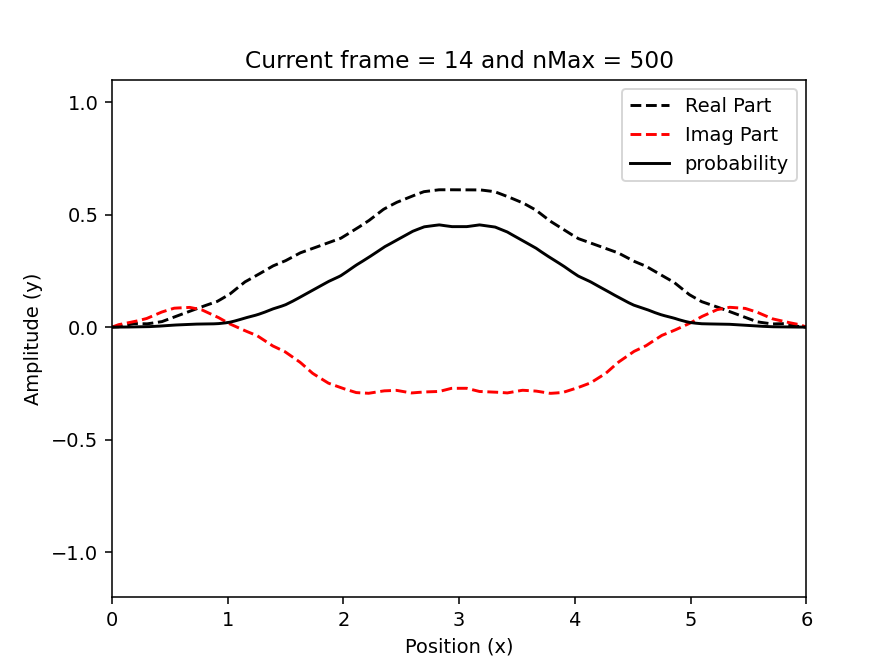

This other state peaks at x = 3. which is the middle.


In [127]:
# Initial wavefunction (Uniform-ish with bdy correct, NO ringing! )
nFrames = 200
nMax = 500
max_time = 2*np.pi/omega_1 
plt.ylim(-1.2,1.1)
fig, ax = plt.subplots()

def Psi0(x,a,Anorm=1):
    val = np.zeros(len(x))
    for idx in range(len(x)):
        if(x[idx]<a/9):
            val[idx] = Anorm*(9/a)*x[idx]
        elif(x[idx]>8*a/9):
            val[idx] = Anorm*(9/a)*(a-x[idx])
        else:
            val[idx] = Anorm 
    return(val)

A = Normalize(Psi0, x, a)
cn = calc_cn(Psi0, psi, x, a, A, nMax)

def animate(frame_num):
    
    # clear the plot and (re)set fixed axis limits 
    ax.clear()
    plt.xlim(xLeft,xRight)
    plt.ylim(-1.2,1.1)
    
    # the current time of the frame (this changes everytime this function is called)
    cur_t = max_time*(frame_num/nFrames)
    
    # Using the cur_t, define the function f(x,t) you are plotting 
    superposition = np.zeros(len(x),dtype=np.cdouble)
    
    
    for n in range(1, nMax+1):
        superposition += cn[n]*psi(x, n, a)*np.exp((-1j)*Eng(n, a)*cur_t)
    
    # List comprehension technique, see manual for explanation 
    Rpart = np.array([ s.real for s in superposition ])
    Ipart = np.array([ s.imag for s in superposition ])
    probability = Rpart**2 + Ipart**2
    
    # (re)draw the plot 
    plt.plot(x, Rpart,'k--',label='Real Part')
    plt.plot(x, Ipart,'r--',label='Imag Part')
    plt.plot(x, probability, 'k', label = 'probability')
    
    # plot annotations
    plt.legend(loc=1) # loc is a kwarg that forces the location of the legend
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude (y)")
    plt.title(f'Current frame = {frame_num} and nMax = {nMax}') # f-strings are great, learn and use those more. 
    
    return


# interval gives time spacing between each frame. Larger number means slower (given all else fixed)
anim = FuncAnimation(fig, animate, frames=nFrames, interval=1)

print('''This other state peaks at x = 3. which is the middle.''')

### Block 13: Gaussian

$$ \Psi(x,0) = A e^{-(x-\mu)^2/(2\sigma^2)} $$

```# nFrames = 200, nMax = 500, max_time = 2*np.pi/omega1 , plt.ylim(-1.2,1.1)```

<IPython.core.display.Javascript object>


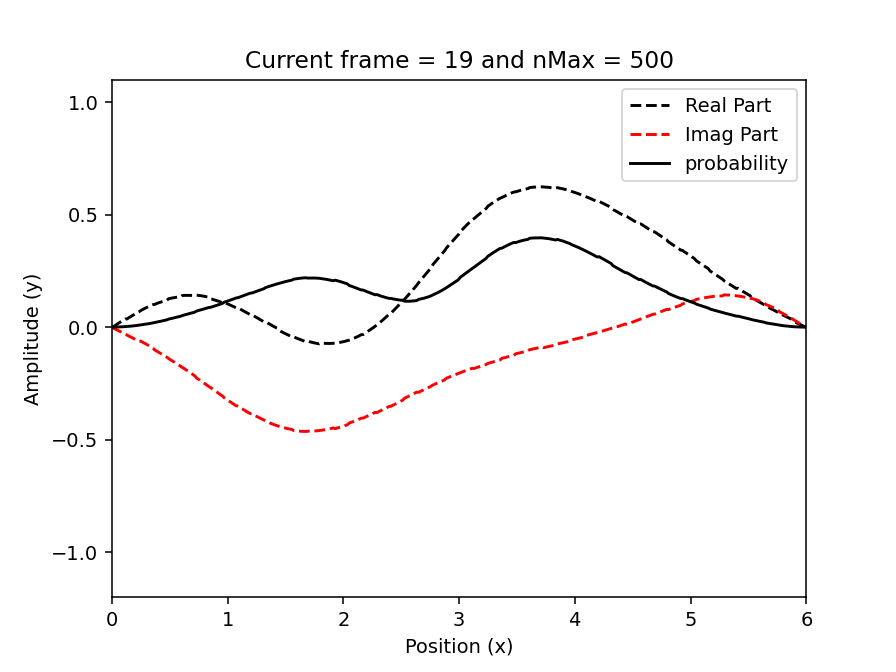

a) The evolution is symmetrical throughout all time. It goes from looking like a sine wave to turning into
a mountain with a peak at the middle, x = 3.
b) When mu = a/3, the mountain that peaks peaks at x = 2 and x = 4 now, which is 1/3 multiples of a. Whereas
when mu = a/2, the mountain peaked at x = 3, which is 1/2 of a. So from these observations, 
whatever multiple of a mu is is where the mountain will peak at.


In [128]:
# Initial wavefunction (Gaussian)
nFrames = 200
nMax = 500
max_time = 2*np.pi/omega_1 
plt.ylim(-1.2,1.1)
fig, ax = plt.subplots()

def Psi0(x,a,Anorm=1):
    val = 0
    sigma=0.75
    mu=a/3
    val = Anorm*np.exp(-(x-mu)**2/(2*sigma**2))
    return(val)

A = Normalize(Psi0, x, a)
cn = calc_cn(Psi0, psi, x, a, A, nMax)

def animate(frame_num):
    
    # clear the plot and (re)set fixed axis limits 
    ax.clear()
    plt.xlim(xLeft,xRight)
    plt.ylim(-1.2,1.1)
    
    # the current time of the frame (this changes everytime this function is called)
    cur_t = max_time*(frame_num/nFrames)
    
    # Using the cur_t, define the function f(x,t) you are plotting 
    superposition = np.zeros(len(x),dtype=np.cdouble)
    
    
    for n in range(1, nMax+1):
        superposition += cn[n]*psi(x, n, a)*np.exp((-1j)*Eng(n, a)*cur_t)
    
    # List comprehension technique, see manual for explanation 
    Rpart = np.array([ s.real for s in superposition ])
    Ipart = np.array([ s.imag for s in superposition ])
    probability = Rpart**2 + Ipart**2
    
    # (re)draw the plot 
    plt.plot(x, Rpart,'k--',label='Real Part')
    plt.plot(x, Ipart,'r--',label='Imag Part')
    plt.plot(x, probability, 'k', label = 'probability')
    
    # plot annotations
    plt.legend(loc=1) # loc is a kwarg that forces the location of the legend
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude (y)")
    plt.title(f'Current frame = {frame_num} and nMax = {nMax}') # f-strings are great, learn and use those more. 
    
    return


# interval gives time spacing between each frame. Larger number means slower (given all else fixed)
anim = FuncAnimation(fig, animate, frames=nFrames, interval=1)

print('''a) The evolution is symmetrical throughout all time. It goes from looking like a sine wave to turning into
a mountain with a peak at the middle, x = 3.
b) When mu = a/3, the mountain that peaks peaks at x = 2 and x = 4 now, which is 1/3 multiples of a. Whereas
when mu = a/2, the mountain peaked at x = 3, which is 1/2 of a. So from these observations, 
whatever multiple of a mu is is where the mountain will peak at.''')

### Block 14: Dirac Delta-ish

$$ \Psi(x,0) = A e^{-(x-\mu)^2/(2\sigma^2)} $$

```# nFrames = 700, nMax = 1000, max_time = 0.3334*2*np.pi/omega1 , plt.ylim(-1.2,3.1)```

<IPython.core.display.Javascript object>


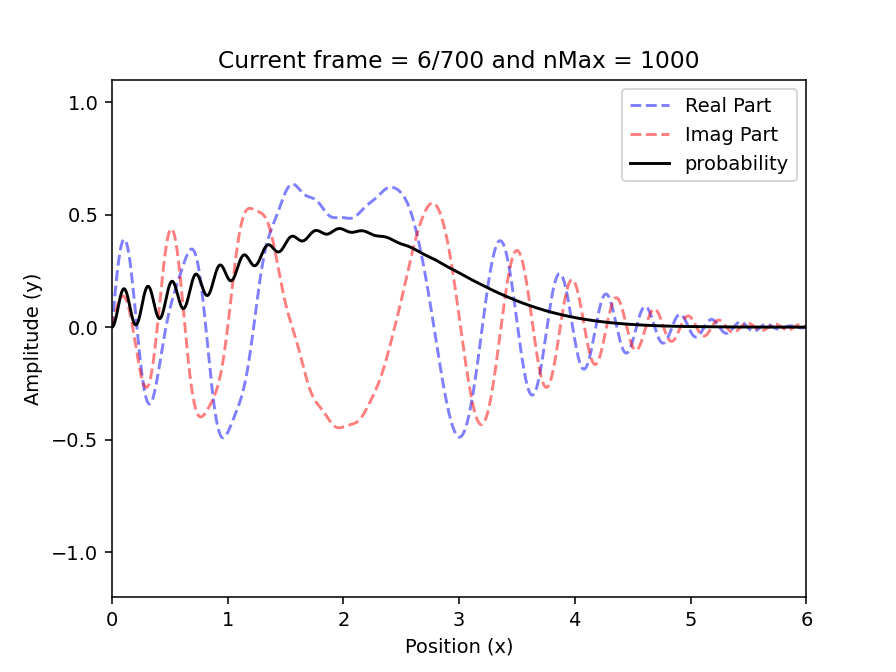

a) I can not confirm any patterns with this evolution, but to me i feel like i see it have 1 peak, 
then evolve into 2 peaks, then 3 peaks, then 4 peaks and so on. Also some interesting symmetry that i see is when it has even
number of peaks it is symmetrical, so like when the number of peaks is 2 or 4. 
b) On average across time i feel like the most likely spot to find the particle at some future time is in the middle at
x = 3.


In [129]:
# Initial wavefunction (Sharply Peaked Gaussian Dirac Delta-ish)
nFrames = 700
nMax = 1000
max_time = 0.3334*2*np.pi/omega_1
plt.ylim(-1.2,4.1)
fig, ax = plt.subplots()

def Psi0(x,a,Anorm=1):
    val = 0
    sigma=0.1
    mu=2
    val = Anorm*np.exp(-(x-mu)**2/(2*sigma**2))
    return(val)

A = Normalize(Psi0, x, a)
cn = calc_cn(Psi0, psi, x, a, A, nMax)

def animate(frame_num):
    
    # clear the plot and (re)set fixed axis limits 
    ax.clear()
    plt.xlim(xLeft,xRight)
    plt.ylim(-1.2,1.1)
    
    # the current time of the frame (this changes everytime this function is called)
    cur_t = max_time*(frame_num/nFrames)
    
    # Using the cur_t, define the function f(x,t) you are plotting 
    superposition = np.zeros(len(x),dtype=np.cdouble)
    
    
    for n in range(1, nMax+1):
        superposition += cn[n]*psi(x, n, a)*np.exp((-1j)*Eng(n, a)*cur_t)
    
    # List comprehension technique, see manual for explanation 
    Rpart = np.array([ s.real for s in superposition ])
    Ipart = np.array([ s.imag for s in superposition ])
    probability = Rpart**2 + Ipart**2
    
    # (re)draw the plot 
    plt.plot(x, Rpart,'b--',alpha = 0.5, label='Real Part')
    plt.plot(x, Ipart,'r--',alpha = 0.5, label='Imag Part')
    plt.plot(x, probability, 'k', label = 'probability')
    
    # plot annotations
    plt.legend(loc=1) # loc is a kwarg that forces the location of the legend
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude (y)")
    plt.title(f'Current frame = {frame_num}/{nFrames} and nMax = {nMax}') # f-strings are great, learn and use those more. 
    
    return


# interval gives time spacing between each frame. Larger number means slower (given all else fixed)
anim = FuncAnimation(fig, animate, frames=nFrames, interval=100)

print('''a) I can not confirm any patterns with this evolution, but to me i feel like i see it have 1 peak, 
then evolve into 2 peaks, then 3 peaks, then 4 peaks and so on. Also some interesting symmetry that i see is when it has even
number of peaks it is symmetrical, so like when the number of peaks is 2 or 4. 
b) On average across time i feel like the most likely spot to find the particle at some future time is in the middle at
x = 3.''')

### Block 15: Recursion and Hermite Polynomials

<IPython.core.display.Javascript object>


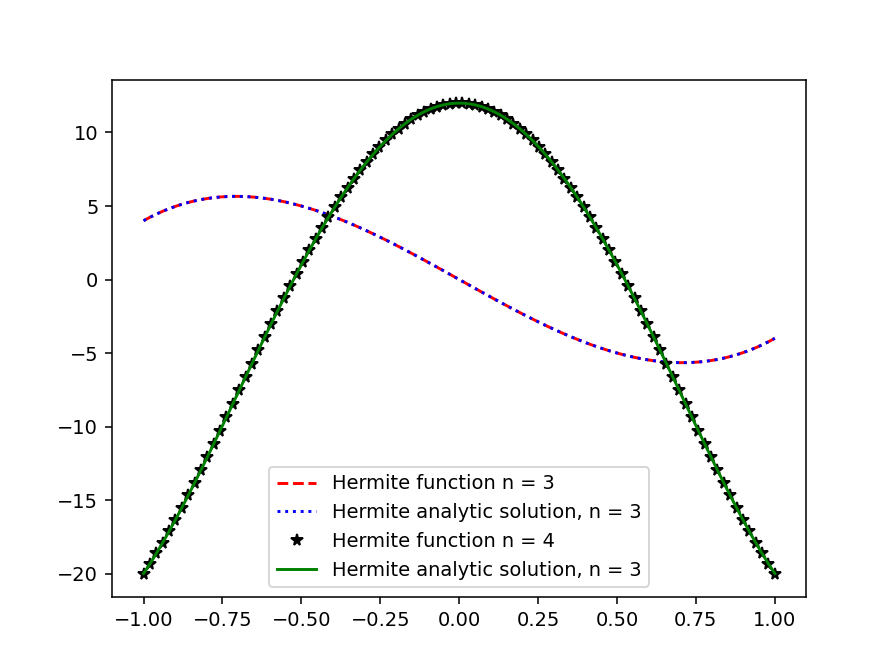

In [130]:
''' Block 15: Recursion '''

import numpy as np
import math
import matplotlib.pyplot as plt 
    
    
def Factorial(x):
    assert type(x)==int and x >= 0, "only works on pos integers and zero"
    
    if(x>1):
        return(x*Factorial(x-1))
    else:
        return(1)
    

'''
myHermite: Calculates the value of the n-th Hermite polynomial at location x.
inputs: x (float) and n (positive int)
output: v (float)
'''
# a)
def Hermite(x,n):  
    assert type(n)==int and n >= 0, "only works on pos integers and zero"
     
    if n > 1:
        return(2*x*Hermite(x, n - 1) - 2*(n - 1)*Hermite(x, n - 2))
    if n == 1:
        return(2*x)
    if n == 0:
        return(1)
    return()

# b)
x = np.linspace(-1, 1, 100)
plt.figure()
plt.plot(x, Hermite(x, 3), 'r--', label = "Hermite function n = 3")
plt.plot(x, 8*x**3 - 12*x, 'b:', label = "Hermite analytic solution, n = 3")

# c)
plt.plot(x, Hermite(x, 4), 'k*', label = "Hermite function n = 4")
plt.plot(x, 16*x**4 - 48*x**2 + 12, 'g',label = "Hermite analytic solution, n = 3")
plt.legend()


### Block 16: Stationary States of the Quantum Oscillator

In [131]:
''' Block 16: Stationary States of the Quantum Oscillator '''

import numpy as np


def Hermite(x,n):  
    assert type(n)==int and n >= 0, "only works on pos integers and zero"
     
    if n > 1:
        return(2*x*Hermite(x, n - 1) - 2*(n - 1)*Hermite(x, n - 2))
    if n == 1:
        return(2*x)
    if n == 0:
        return(1)
    return()

def Factorial(x):
    assert type(x)==int and x >= 0, "only works on pos integers and zero"
    
    if(x>1):
        return(x*Factorial(x-1))
    else:
        return(1)    
    
def psi(x,n): 
    assert type(n)==int and n >= 0, "only works on pos integers and zero"
    
    val = np.zeros(len(x))
    val = (1/np.pi)**0.25*Hermite(x, n)/np.sqrt(2**n*Factorial(n))*np.exp(-x**2/2)
    
    return(val)
    
    
nTest = [0,1,2,3,5,7]

# normalized test  
print("d) normalized test")
for n in nTest:
    xc = np.sqrt(2*n + 1)
    x = np.linspace(-2.5*xc, 2.5*xc, 200)
    print(f"when n = {n}, integral = {np.trapz(psi(x, n)*psi(x, n), x)}")


# orthogonal test 
xc = np.sqrt(5)
x = np.linspace(-2.5*xc, 2.5*xc, 200)
print("e) Orthogonal test")
print(f'''when n = 0, and m = 1, {np.trapz(psi(x, 0)*psi(x, 1), x)}
when n = 0, and m = 2, {np.trapz(psi(x, 0)*psi(x, 2), x)}
when n = 1, and m = 2, {np.trapz(psi(x, 1)*psi(x, 2), x)}''')

d) normalized test
when n = 0, integral = 0.9995924751201192
when n = 1, integral = 0.9999999635420285
when n = 2, integral = 0.9999999999944713
when n = 3, integral = 0.9999999999999992
when n = 5, integral = 0.9999999999999999
when n = 7, integral = 1.0
e) Orthogonal test
when n = 0, and m = 1, -5.551115123125783e-17
when n = 0, and m = 2, -1.2331802246023926e-13
when n = 1, and m = 2, 1.6653345369377348e-16


### Block 17 Classical and Non-Classical Features 

<IPython.core.display.Javascript object>


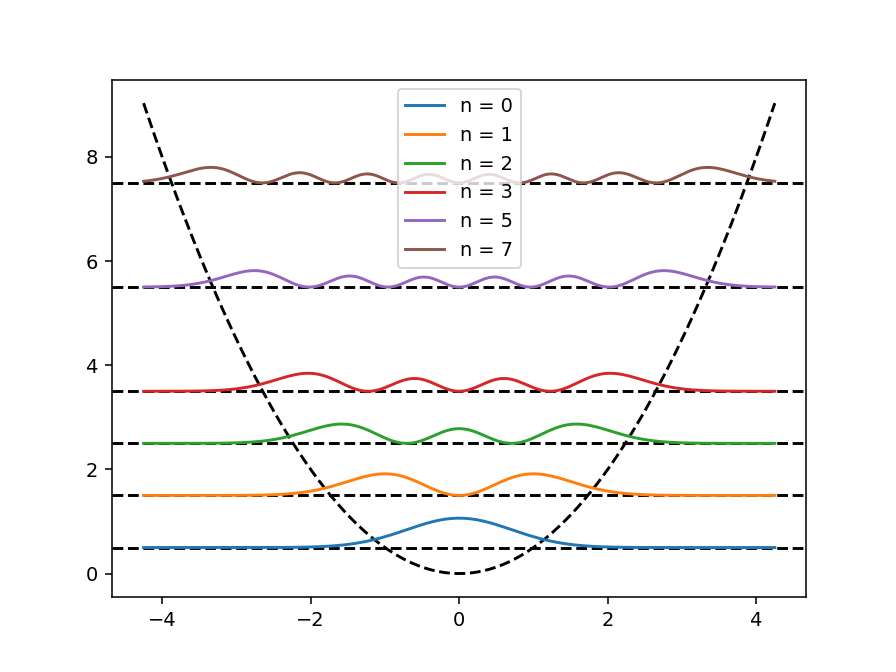

In [132]:
''' Block 17: Classical and Non-Classical Features '''

import numpy as np
import math
import matplotlib.pyplot as plt 
plt.figure(dpi=100)

def Hermite(x,n):  
    assert type(n)==int and n >= 0, "only works on pos integers and zero"
     
    if n > 1:
        return(2*x*Hermite(x, n - 1) - 2*(n - 1)*Hermite(x, n - 2))
    if n == 1:
        return(2*x)
    if n == 0:
        return(1)
    return()

def Factorial(x):
    assert type(x)==int and x >= 0, "only works on pos integers and zero"
    
    if(x>1):
        return(x*Factorial(x-1))
    else:
        return(1)    
    
def psi(x,n): 
    assert type(n)==int and n >= 0, "only works on pos integers and zero"
    
    val = np.zeros(len(x))
    val = (1/np.pi)**0.25*Hermite(x, n)/np.sqrt(2**n*Factorial(n))*np.exp(-x**2/2)
    
    return(val)


x = np.linspace(-4.25,4.25,200)
nTest = [0,1,2,3,5,7]

v = 1/2*x**2

# b)
plt.plot(x, v, 'k--') #label = 'non-dimensional potential')

# c)
for n in nTest:
    En = n + 1/2
    plt.axhline(En, color = "black", linestyle = '--') #label = f"E{n}")

# d)
for n in nTest:
    En = n + 1/2 
    y = En + psi(x, n)**2
    plt.plot(x, y, label = f"n = {n}")

plt.legend()


Continuing Block 17 : Classical and Non-Classical Features

(a) When you consider the dashed potential curve and the horizontal
lines only, how do these dashed curves reveal the location of the
classical turning points for each n value?
- Where the potential curve and the horizontal lines
  interesect is where the classical turning points are for each E_n.

(b) Non-classical feature: How do the probability density curves
show that the quantum oscillator can sometimes be found somewhere
outside the classically allowed region?
- The probability density curve is nonzero outside of the classical turning points, which means their is a nonzero probablity of finding the quantum oscillator outside the classically allowed region. 

(c) No question, just a statement: If we thought about what the
probability density curve might look like for a classic
oscillator (pendulum, etc.), the probability would be maximized
near ±xc, i.e., it is more likely for us to take a random photo
of an oscillating pendulum and the picture reveal the pendulum
far from being vertical. This is where the pendulum is also
moving the slowest, so it spends more time at these far-out
points.
- I see. 

(d) Where are you most likely to find a quantum oscillator for
low-values of n (0,1,2)? Does that match the classical
prediction?
- when n = 0, you are most likely to find a quantum oscillator at the vertical position. This does not match the classical prediction.
  when n = 1, you are most likely to find a quantum oscillator on both sides where it is in between where it peaks and where it is in a trough. This does match the classical prediction.
  when n = 2, you are most likely to find a quantum oscillator in between where it peaks and where it is in a trough, this does match the clasical prediction.
  

(e) What about larger values of n like 5 or 7? Carefully consider
the amplitudes in each state. Include more curves if you want.
When you’re ready to generalize, what might you conclude about
where you find the quantum oscillator as the energy (and value of n)
increases? As energy increases, does it behave more or less
like its classical counterpart?
- Larger values of n like 5 or 7 have the highest probability of being found near xc. I am going to conclude that as the energy and value of n increases, the quantum oscillator behaves more like a classical oscillator. 


### Block 18: Function Redux

In [134]:
import numpy as np
import math
import matplotlib.pyplot as plt 
#plt.figure(dpi=100)

def Hermite(x,n):  
    assert type(n)==int and n >= 0, "only works on pos integers and zero"
     
    if n > 1:
        return(2*x*Hermite(x, n - 1) - 2*(n - 1)*Hermite(x, n - 2))
    if n == 1:
        return(2*x)
    if n == 0:
        return(1)
    return()

def Factorial(x):
    assert type(x)==int and x >= 0, "only works on pos integers and zero"
    
    if(x>1):
        return(x*Factorial(x-1))
    else:
        return(1)    
    
def psi(x,n): 
    assert type(n)==int and n >= 0, "only works on pos integers and zero"
    
    val = np.zeros(len(x))
    val = (1/np.pi)**0.25*Hermite(x, n)/np.sqrt(2**n*Factorial(n))*np.exp(-x**2/2)
    
    return(val)

def Psi0(x,Anorm=1):
    y = np.zeros(len(x))
    y = Anorm*(psi(x,0) + 2*psi(x,1) + psi(x,2))
    return(y)

# normalization  
def Normalize(Psi0,x):
    A = np.sqrt(1/np.trapz(Psi0(x, 1)**2, x))
    
    return(A)

# Energy 
def Eng(n):
    val = n + 1/2 
    
    return(val)

# Projection routine for energy coefficients
def calc_cn(Psi0,psi,x,Anorm=1,nMax=100): 
    cn = np.zeros(nMax + 1)
    for i in range(1, nMax + 1):
        cn[i] = np.trapz(psi(x, i)*Psi0(x, Anorm), x)
        
    return(cn)

# f)
n = 2
xc = np.sqrt(2*n + 1)
x = np.linspace(-2*xc, 2*xc, 200)
A = Normalize(Psi0, x)
print(f"A is {A}")
print(f"1/sqrt(6) is {1/np.sqrt(6)}")

# g)
cn = calc_cn(Psi0, psi, x, A, 5)
print("cn is", cn)
val = 0
for i in range(1, 6):
    val += cn[i]**2
    
print("∑|cn|**2 is",val)
print("∑|cn|**2 does not equal 1, it is .8333")


A is 0.4082482997911029
1/sqrt(6) is 0.4082482904638631
cn is [ 0.00000000e+00  8.16496591e-01  4.08248209e-01 -1.40226585e-07
 -9.75059421e-07 -1.09592839e-06]
∑|cn|**2 is 0.8333332825937579
∑|cn|**2 does not equal 1, it is .8333


### Block 19: Oscillator Animation Tests

```# nFrames = 100, nMax = 5, max_time = 2*np.pi/omega1 , plt.ylim(-1.2,1.1)```


<IPython.core.display.Javascript object>


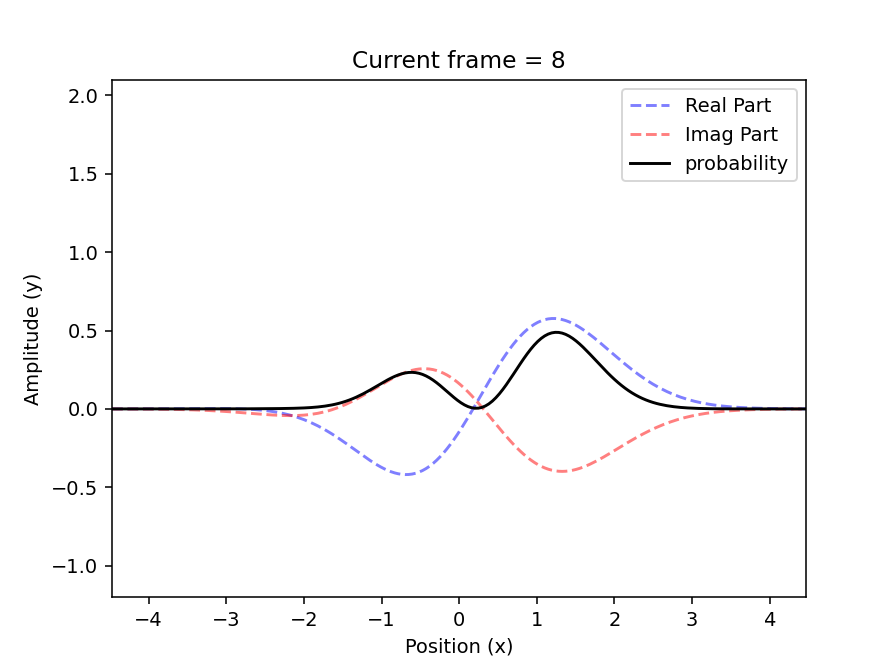

In [135]:
# Needed for interactivity and must come first
%matplotlib notebook 

# Import relevant modules (plotting, animating functions, and numpy)
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

def Hermite(x,n):  
    assert type(n)==int and n >= 0, "only works on pos integers and zero"
     
    if n > 1:
        return(2*x*Hermite(x, n - 1) - 2*(n - 1)*Hermite(x, n - 2))
    if n == 1:
        return(2*x)
    if n == 0:
        return(1)
    return()

def Factorial(x):
    assert type(x)==int and x >= 0, "only works on pos integers and zero"
    
    if(x>1):
        return(x*Factorial(x-1))
    else:
        return(1)    
    
def psi(x,n): 
    assert type(n)==int and n >= 0, "only works on pos integers and zero"
    
    val = np.zeros(len(x))
    val = (1/np.pi)**0.25*Hermite(x, n)/np.sqrt(float(2**n*Factorial(n)))*np.exp(-x**2/2)
    
    return(val)

# normalization  
def Normalize(Psi0,x):
    A = np.sqrt(1/np.trapz(Psi0(x, 1)**2, x))
    
    return(A)

# Energy 
def Eng(n):
    val = n + 1/2 
    
    return(val)

# Projection routine for energy coefficients
def calc_cn(Psi0,psi,x,Anorm=1,nMax=100): 
    cn = np.zeros(nMax + 1)
    for i in range(1, nMax + 1):
        cn[i] = np.trapz(psi(x, i)*Psi0(x, Anorm), x)
        
    return(cn)

# stationary state 
# nFrames = 100, nMax = 5, max_time = 2*np.pi/omega1 , plt.ylim(-1.2,1.1)
'''
def Psi0(x,Anorm=1):
    y = np.zeros(len(x))
    y = Anorm*psi(x,2)
    return(y)
'''

# simple superposition
# nFrames = 100, nMax = 5, max_time = 2*np.pi/omega1 , plt.ylim(-1.2,1.1)
def Psi0(x,Anorm=1):
    y = np.zeros(len(x))
    y = Anorm*(psi(x,0) + 2*psi(x,1) + psi(x,2))
    return(y)
    


# create figure and axis objects. These are objects that plt.plot utilized under 
# the hood and have many of the same functions and options, albeit sometimes with slightly 
# different names. 
fig, ax = plt.subplots()

# number of frames
nFrames = 100

# finite number of c_n  
nMax = 20 # number of c_n

# horizontal axis range
xLeft = -2*np.sqrt(5)
xRight= -xLeft
x = np.linspace(xLeft,xRight,200)

# Determine normalization constant 
A = Normalize(Psi0, x)

# Calculate the c_n, since they do not depend on time. 
cn = calc_cn(Psi0, psi, x, A, nMax)

# Smallest frequency = omega1 
omega1 = Eng(1)

# animations go from t = 0 to t = max_time  
# for a smooth animation of periodic motion, 
# should be some integer multiple of the period
max_time = 2*np.pi/omega1

# define what is plotted across x for a given moment in time (cur_t)
# Think of this as a loop where frame_num = 0, 1, ..., nFrames
def animate(frame_num):
    
    # clear the plot and (re)set fixed axis limits 
    ax.clear()
    plt.xlim(xLeft,xRight)
    plt.ylim(-1.2,2.1)
    
    # the current time of the frame (this changes everytime this function is called)
    cur_t = max_time*(frame_num/nFrames)
    
    # Using the cur_t, define the function f(x,t) you are plotting 
    superposition = np.zeros(len(x),dtype=np.cdouble)
    
    for n in range(1, nMax+1):
        superposition += cn[n]*psi(x, n)*np.exp((-1j)*Eng(n)*cur_t)
    
    # List comprehension technique, see manual for explanation 
    Rpart = np.array([ s.real for s in superposition ])
    Ipart = np.array([ s.imag for s in superposition ])
    probability = Rpart**2 + Ipart**2
    
    # (re)draw the plot 
    plt.plot(x, Rpart,'b--',alpha = 0.5, label='Real Part')
    plt.plot(x, Ipart,'r--',alpha = 0.5, label='Imag Part')
    plt.plot(x, probability, 'k', label = 'probability') 

    # plot annotations
    plt.legend(loc=1) # loc is a kwarg that forces the location of the legend
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude (y)")
    plt.title(f'Current frame = {frame_num}') # f-strings are great, learn and use those more. 
    
    return


# interval gives time spacing between each frame. Larger number means slower (given all else fixed)
anim = FuncAnimation(fig, animate, frames=nFrames, interval=.5)

# e) 
# The wave function does exhibit an oscillatory behavior. 

### Block 20: Superposition of high energy modes

$$\Psi(x,0) = A \psi_6(x) + 2A \psi_7(x) + A \psi_8(x)$$

```# nFrames = 100, nMax = 10, max_time = 2*np.pi/omega1 , plt.ylim(-1.2,1.5)```

<IPython.core.display.Javascript object>


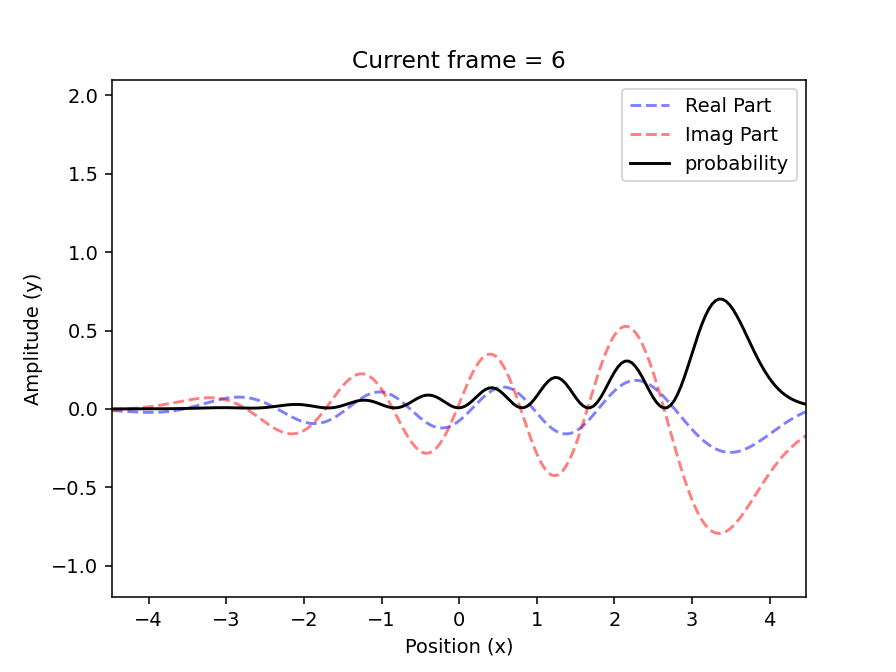

In [136]:
# nFrames = 100, nMax = 10, max_time = 2*np.pi/omega1 , plt.ylim(-1.2,1.5)
def Psi0(x,Anorm=1):
    y = np.zeros(len(x))
    y = Anorm*(psi(x,6) + 2*psi(x,7) + psi(x,8))
    return(y)

# create figure and axis objects. These are objects that plt.plot utilized under 
# the hood and have many of the same functions and options, albeit sometimes with slightly 
# different names. 
fig, ax = plt.subplots()

# number of frames
nFrames = 100

# finite number of c_n  
nMax = 20 # number of c_n

# horizontal axis range
xLeft = -2*np.sqrt(5)
xRight= -xLeft
x = np.linspace(xLeft,xRight,200)

# Determine normalization constant 
A = Normalize(Psi0, x)

# Calculate the c_n, since they do not depend on time. 
cn = calc_cn(Psi0, psi, x, A, nMax)

# Smallest frequency = omega1 
omega1 = Eng(1)

# animations go from t = 0 to t = max_time  
# for a smooth animation of periodic motion, 
# should be some integer multiple of the period
max_time = 2*np.pi/omega1

# define what is plotted across x for a given moment in time (cur_t)
# Think of this as a loop where frame_num = 0, 1, ..., nFrames
def animate(frame_num):
    
    # clear the plot and (re)set fixed axis limits 
    ax.clear()
    plt.xlim(xLeft,xRight)
    plt.ylim(-1.2,2.1)
    
    # the current time of the frame (this changes everytime this function is called)
    cur_t = max_time*(frame_num/nFrames)
    
    # Using the cur_t, define the function f(x,t) you are plotting 
    superposition = np.zeros(len(x),dtype=np.cdouble)
    
    for n in range(1, nMax+1):
        superposition += cn[n]*psi(x, n)*np.exp((-1j)*Eng(n)*cur_t)
    
    # List comprehension technique, see manual for explanation 
    Rpart = np.array([ s.real for s in superposition ])
    Ipart = np.array([ s.imag for s in superposition ])
    probability = Rpart**2 + Ipart**2
    
    # (re)draw the plot 
    plt.plot(x, Rpart,'b--',alpha = 0.5, label='Real Part')
    plt.plot(x, Ipart,'r--',alpha = 0.5, label='Imag Part')
    plt.plot(x, probability, 'k', label = 'probability') 

    # plot annotations
    plt.legend(loc=1) # loc is a kwarg that forces the location of the legend
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude (y)")
    plt.title(f'Current frame = {frame_num}') # f-strings are great, learn and use those more. 
    
    return


# interval gives time spacing between each frame. Larger number means slower (given all else fixed)
anim = FuncAnimation(fig, animate, frames=nFrames, interval=.5)

# comparing this superposition of high energy modes to the previous superposition of low energy modes, I think that the 
# superposition of low energy modes behaves more classically. 
# On the superpostion of low energy modes they only had 2 peaks. However for this superpostion of high energy modes,
# there are multiple peaks. 

### Block 21: Near center Gaussian 

$$ \Psi(x,0) = A e^{-(x-\mu)^2/(2\sigma^2)} $$

```# nFrames = 100, nMax = 20, max_time = 2*np.pi/omega1 , plt.ylim(-1.2,2.1)```

<IPython.core.display.Javascript object>


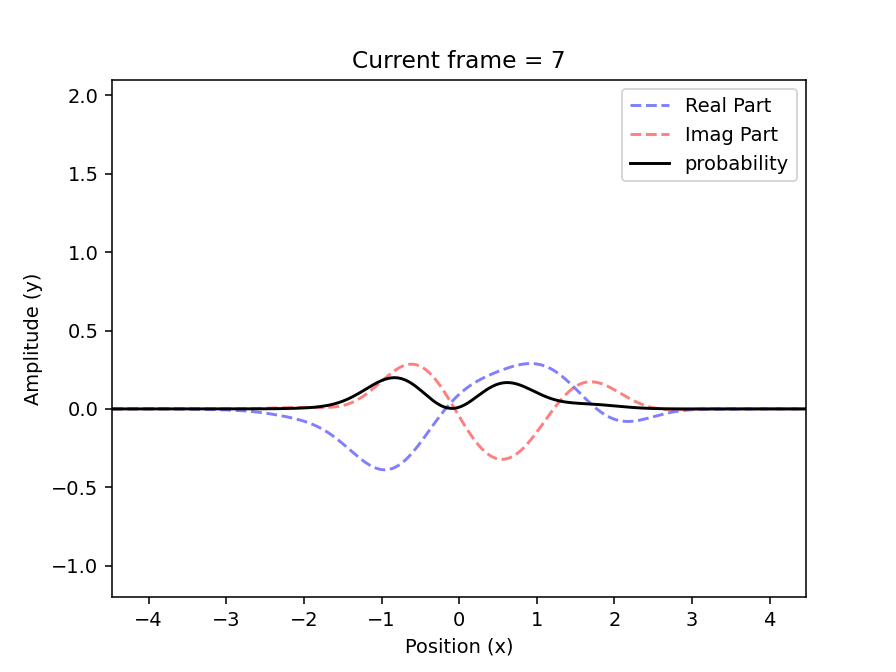

In [137]:
# nFrames = 100, nMax = 20, max_time = 2*np.pi/omega1 , plt.ylim(-1.2,2.1)
def Psi0(x,Anorm=1):
    mu=0.5
    sigma = 0.5
    y = Anorm*np.exp(-(x-mu)**2/(2*sigma**2))
    return(y)

# create figure and axis objects. These are objects that plt.plot utilized under 
# the hood and have many of the same functions and options, albeit sometimes with slightly 
# different names. 
fig, ax = plt.subplots()

# number of frames
nFrames = 100

# finite number of c_n  
nMax = 20 # number of c_n

# horizontal axis range
xLeft = -2*np.sqrt(5)
xRight= -xLeft
x = np.linspace(xLeft,xRight,200)

# Determine normalization constant 
A = Normalize(Psi0, x)

# Calculate the c_n, since they do not depend on time. 
cn = calc_cn(Psi0, psi, x, A, nMax)

# Smallest frequency = omega1 
omega1 = Eng(1)

# animations go from t = 0 to t = max_time  
# for a smooth animation of periodic motion, 
# should be some integer multiple of the period
max_time = 2*np.pi/omega1

# define what is plotted across x for a given moment in time (cur_t)
# Think of this as a loop where frame_num = 0, 1, ..., nFrames
def animate(frame_num):
    
    # clear the plot and (re)set fixed axis limits 
    ax.clear()
    plt.xlim(xLeft,xRight)
    plt.ylim(-1.2,2.1)
    
    # the current time of the frame (this changes everytime this function is called)
    cur_t = max_time*(frame_num/nFrames)
    
    # Using the cur_t, define the function f(x,t) you are plotting 
    superposition = np.zeros(len(x),dtype=np.cdouble)
    
    for n in range(1, nMax+1):
        superposition += cn[n]*psi(x, n)*np.exp((-1j)*Eng(n)*cur_t)
    
    # List comprehension technique, see manual for explanation 
    Rpart = np.array([ s.real for s in superposition ])
    Ipart = np.array([ s.imag for s in superposition ])
    probability = Rpart**2 + Ipart**2
    
    # (re)draw the plot 
    plt.plot(x, Rpart,'b--',alpha = 0.5, label='Real Part')
    plt.plot(x, Ipart,'r--',alpha = 0.5, label='Imag Part')
    plt.plot(x, probability, 'k', label = 'probability') 

    # plot annotations
    plt.legend(loc=1) # loc is a kwarg that forces the location of the legend
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude (y)")
    plt.title(f'Current frame = {frame_num}') # f-strings are great, learn and use those more. 
    
    return


# interval gives time spacing between each frame. Larger number means slower (given all else fixed)
anim = FuncAnimation(fig, animate, frames=nFrames, interval=.5)

# Use the power button to stop the animation. If you are saving to a file, you won't see the animation 
# but still need to hit the stop button. The file may take a few seconds to be fully created. 

# Also have to stop the animation when saving to a file. .gif or .mp4 should work. 
# anim.save('Test.mp4',dpi=150) # dpi=150 ups the resolution, default is kinda crappy. 

Block 21 comments
The potential well evolution was more interesting. This one looks kinda boring. 

### Block 22: Gaussian farther from origin

$$ \Psi(x,0) = A e^{-(x-\mu)^2/(2\sigma^2)} $$

```# nFrames = 100, nMax = 20, max_time = 2*np.pi/omega1 , plt.ylim(-1.2,2.1)```

<IPython.core.display.Javascript object>


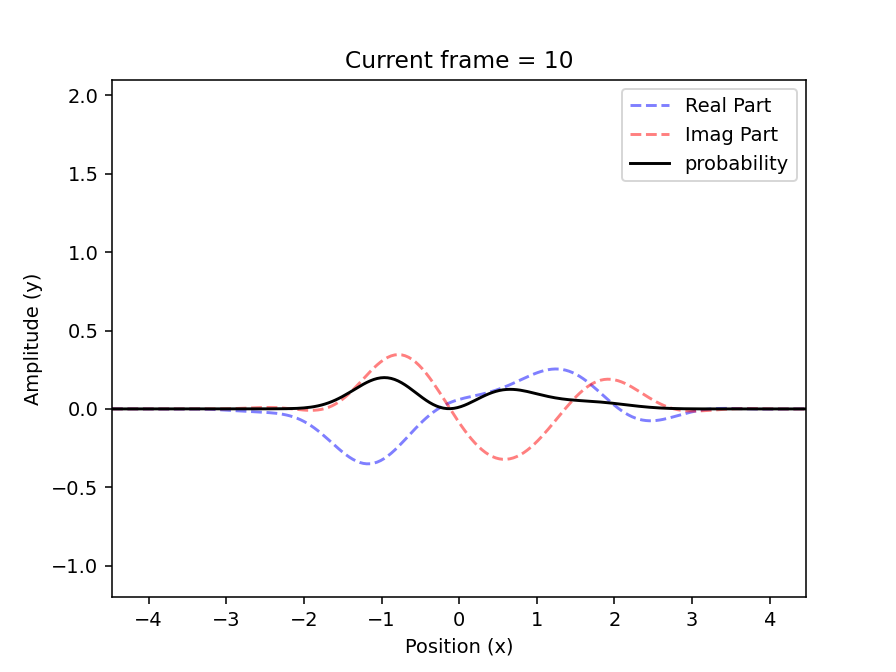

In [138]:
# nFrames = 100, nMax = 20, max_time = 2*np.pi/omega1 , plt.ylim(-1.2,2.1)
def Psi0(x,Anorm=1):
    mu=0.5
    sigma = 0.5
    y = Anorm*np.exp(-(x-mu)**2/(2*sigma**2))
    return(y)

# create figure and axis objects. These are objects that plt.plot utilized under 
# the hood and have many of the same functions and options, albeit sometimes with slightly 
# different names. 
fig, ax = plt.subplots()

# number of frames
nFrames = 100

# finite number of c_n  
nMax = 20 # number of c_n

# horizontal axis range
xLeft = -2*np.sqrt(5)
xRight= -xLeft
x = np.linspace(xLeft,xRight,200)

# Determine normalization constant 
A = Normalize(Psi0, x)

# Calculate the c_n, since they do not depend on time. 
cn = calc_cn(Psi0, psi, x, A, nMax)

# Smallest frequency = omega1 
omega1 = Eng(1)

# animations go from t = 0 to t = max_time  
# for a smooth animation of periodic motion, 
# should be some integer multiple of the period
max_time = 2*np.pi/omega1

# define what is plotted across x for a given moment in time (cur_t)
# Think of this as a loop where frame_num = 0, 1, ..., nFrames
def animate(frame_num):
    
    # clear the plot and (re)set fixed axis limits 
    ax.clear()
    plt.xlim(xLeft,xRight)
    plt.ylim(-1.2,2.1)
    
    # the current time of the frame (this changes everytime this function is called)
    cur_t = max_time*(frame_num/nFrames)
    
    # Using the cur_t, define the function f(x,t) you are plotting 
    superposition = np.zeros(len(x),dtype=np.cdouble)
    
    for n in range(1, nMax+1):
        superposition += cn[n]*psi(x, n)*np.exp((-1j)*Eng(n)*cur_t)
    
    # List comprehension technique, see manual for explanation 
    Rpart = np.array([ s.real for s in superposition ])
    Ipart = np.array([ s.imag for s in superposition ])
    probability = Rpart**2 + Ipart**2
    
    # (re)draw the plot 
    plt.plot(x, Rpart,'b--',alpha = 0.5, label='Real Part')
    plt.plot(x, Ipart,'r--',alpha = 0.5, label='Imag Part')
    plt.plot(x, probability, 'k', label = 'probability') 

    # plot annotations
    plt.legend(loc=1) # loc is a kwarg that forces the location of the legend
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude (y)")
    plt.title(f'Current frame = {frame_num}') # f-strings are great, learn and use those more. 
    
    return


# interval gives time spacing between each frame. Larger number means slower (given all else fixed)
anim = FuncAnimation(fig, animate, frames=nFrames, interval=.5)

# Use the power button to stop the animation. If you are saving to a file, you won't see the animation 
# but still need to hit the stop button. The file may take a few seconds to be fully created. 

# Also have to stop the animation when saving to a file. .gif or .mp4 should work. 
# anim.save('GaussianFartherFromOrigin.gif',dpi=150) # dpi=150 ups the resolution, default is kinda crappy. 

Block 22 Comments
I honestly see no difference between this time evolution and the time evolution in block 21. They look the same to me.
That's cause they are the same lmao. 

### Block 23: Dream On



<IPython.core.display.Javascript object>


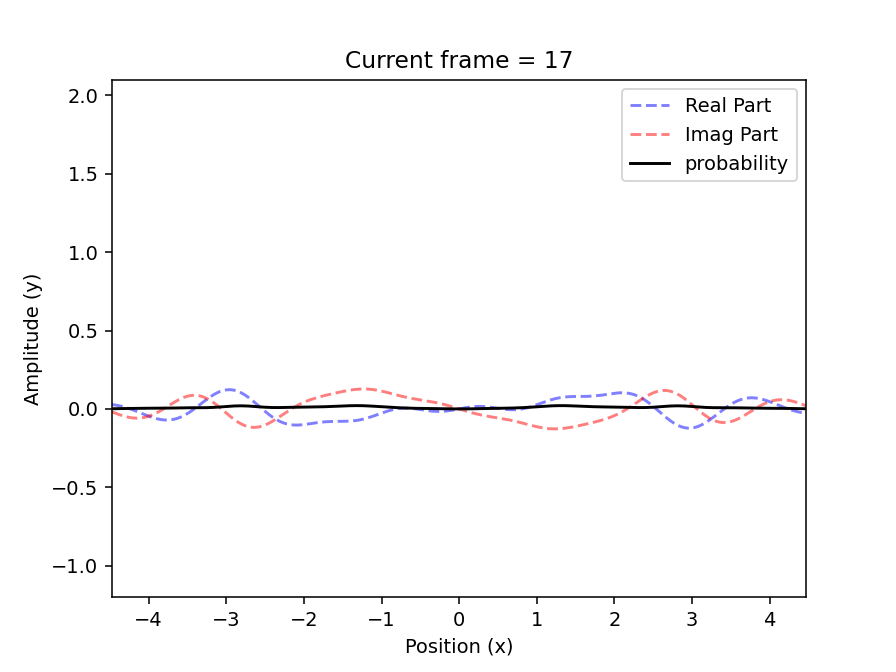

In [139]:
def Psi0(x,Anorm=1):
    y = Anorm*1/x 
    return(y)

# create figure and axis objects. These are objects that plt.plot utilized under 
# the hood and have many of the same functions and options, albeit sometimes with slightly 
# different names. 
fig, ax = plt.subplots()

# number of frames
nFrames = 100

# finite number of c_n  
nMax = 20 # number of c_n

# horizontal axis range
xLeft = -2*np.sqrt(5)
xRight= -xLeft
x = np.linspace(xLeft,xRight,200)

# Determine normalization constant 
A = Normalize(Psi0, x)

# Calculate the c_n, since they do not depend on time. 
cn = calc_cn(Psi0, psi, x, A, nMax)

# Smallest frequency = omega1 
omega1 = Eng(1)

# animations go from t = 0 to t = max_time  
# for a smooth animation of periodic motion, 
# should be some integer multiple of the period
max_time = 2*np.pi/omega1

# define what is plotted across x for a given moment in time (cur_t)
# Think of this as a loop where frame_num = 0, 1, ..., nFrames
def animate(frame_num):
    
    # clear the plot and (re)set fixed axis limits 
    ax.clear()
    plt.xlim(xLeft,xRight)
    plt.ylim(-1.2,2.1)
    
    # the current time of the frame (this changes everytime this function is called)
    cur_t = max_time*(frame_num/nFrames)
    
    # Using the cur_t, define the function f(x,t) you are plotting 
    superposition = np.zeros(len(x),dtype=np.cdouble)
    
    for n in range(1, nMax+1):
        superposition += cn[n]*psi(x, n)*np.exp((-1j)*Eng(n)*cur_t)
    
    # List comprehension technique, see manual for explanation 
    Rpart = np.array([ s.real for s in superposition ])
    Ipart = np.array([ s.imag for s in superposition ])
    probability = Rpart**2 + Ipart**2
    
    # (re)draw the plot 
    plt.plot(x, Rpart,'b--',alpha = 0.5, label='Real Part')
    plt.plot(x, Ipart,'r--',alpha = 0.5, label='Imag Part')
    plt.plot(x, probability, 'k', label = 'probability') 

    # plot annotations
    plt.legend(loc=1) # loc is a kwarg that forces the location of the legend
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude (y)")
    plt.title(f'Current frame = {frame_num}') # f-strings are great, learn and use those more. 
    
    return


# interval gives time spacing between each frame. Larger number means slower (given all else fixed)
anim = FuncAnimation(fig, animate, frames=nFrames, interval=.5)

# Use the power button to stop the animation. If you are saving to a file, you won't see the animation 
# but still need to hit the stop button. The file may take a few seconds to be fully created. 

# Also have to stop the animation when saving to a file. .gif or .mp4 should work. 
# anim.save('GaussianFartherFromOrigin.gif',dpi=150) # dpi=150 ups the resolution, default is kinda crappy. 